<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/working_with_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import time
from matplotlib import pyplot as plt
import cv2
#şekildedektöründen ShapeDetector'ı içe aktar
import argparse
import imutils

In [ ]:
str1='20170925_20171112.geo.unw' Aboneler arasındaki # satır

SyntaxError: invalid syntax (<ipython-input-2-1a5bb6b5cc3b>, line 1)

In [ ]:
img = Image.open('/content/20170925_20171112.geo.png' )
data = np.array(img, dtype='uint8')
image = cv2.imread('/content/20170925_20171112.geo.png')

(397, 552, 4) (397, 552, 3)


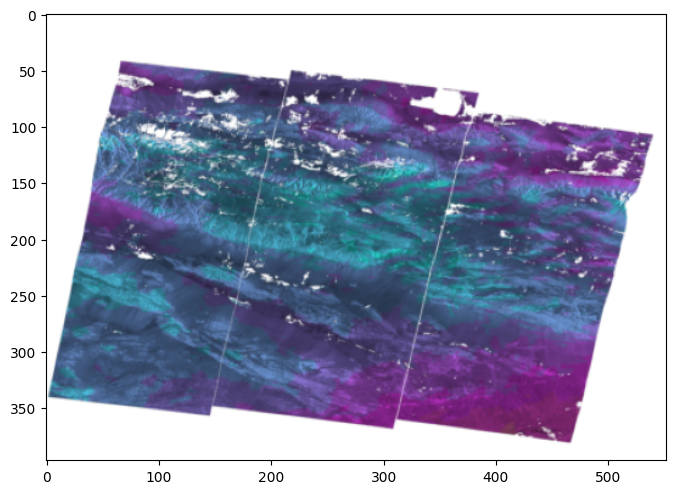

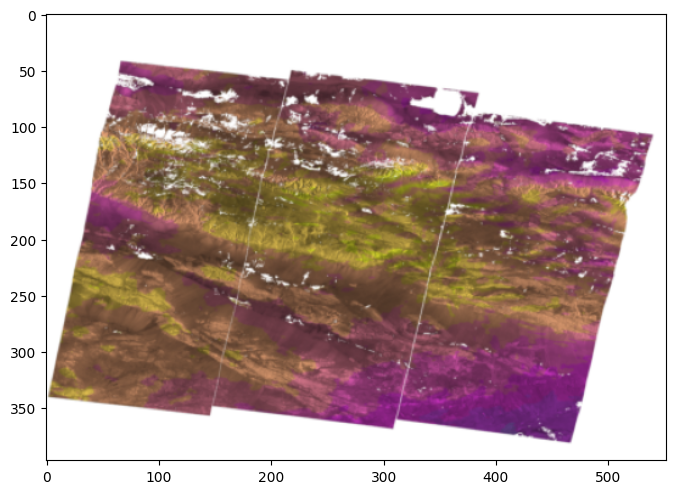

In [ ]:
print(data.shape, image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(data)

plt.figure(figsize=(8, 8))
plt.imshow(image)

plt.show()

In [ ]:
a=data[:,:,3]
#a= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
a=255-a
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY)[1]
#thresh = cv2.adaptiveThreshold(a,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
#kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [ ]:
###### hat tespiti
low_threshold = 50
high_threshold = 150
kernel=5
edges = cv2.Canny(thresh, low_threshold, high_threshold,kernel)
#laplacian = cv2.Laplacian(thresh,cv2.CV_64F)

In [ ]:
####### Hough hattı tespiti
rho = 1  # Hough ızgarasının piksel cinsinden mesafe çözünürlüğü
theta = np.pi / 180  # Hough ızgarasının radyan cinsinden açısal çözünürlüğü
threshold = 10 # minimum oy sayısı (Hough ızgara hücresindeki kesişmeler)
min_line_length = 100  # bir çizgiyi oluşturan minimum piksel sayısı
max_line_gap = 20  # bağlanabilir hat bölümleri arasındaki piksel cinsinden maksimum boşluk
line_image = np.copy(image) * 0  # üzerine çizgi çizmek için boşluk yaratmak

In [ ]:
# Kenarda algılanan görüntüde Hough'u çalıştırın
# Çıkış "satırları", tespit edilen çizgi bölümlerinin uç noktalarını içeren bir dizidir
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
   for x1,y1,x2,y2 in line:
       cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)

TypeError: 'NoneType' object is not iterable

NameError: name 'lines_edges' is not defined

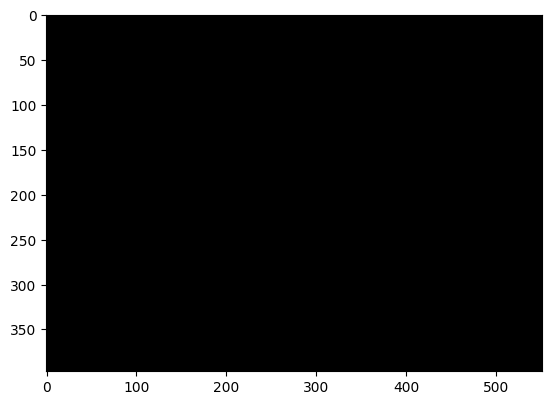

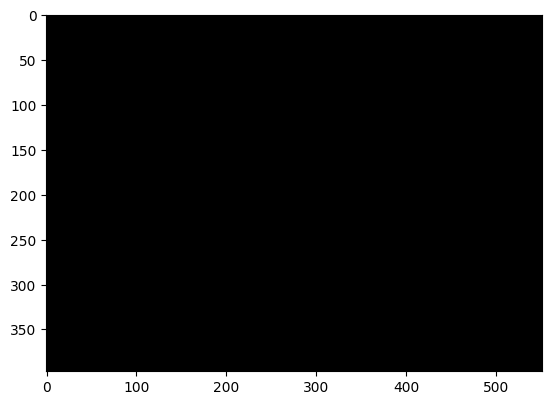

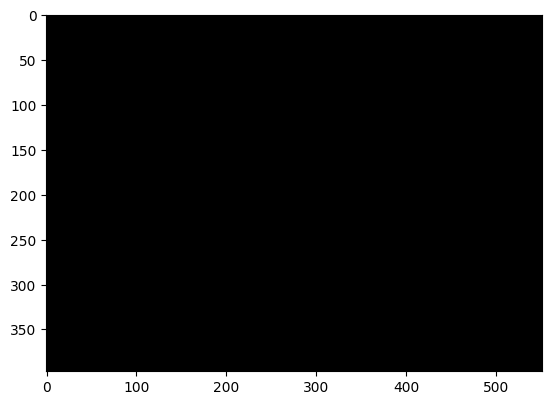

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
plt.imshow(a,cmap='gray')
plt.figure()
plt.imshow(thresh,cmap='gray')
plt.figure()
plt.imshow(edges,cmap='gray')

plt.figure()
plt.imshow(lines_edges,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f268f717240>,
 <matplotlib.image.AxesImage at 0x7f268f67b9e8>)

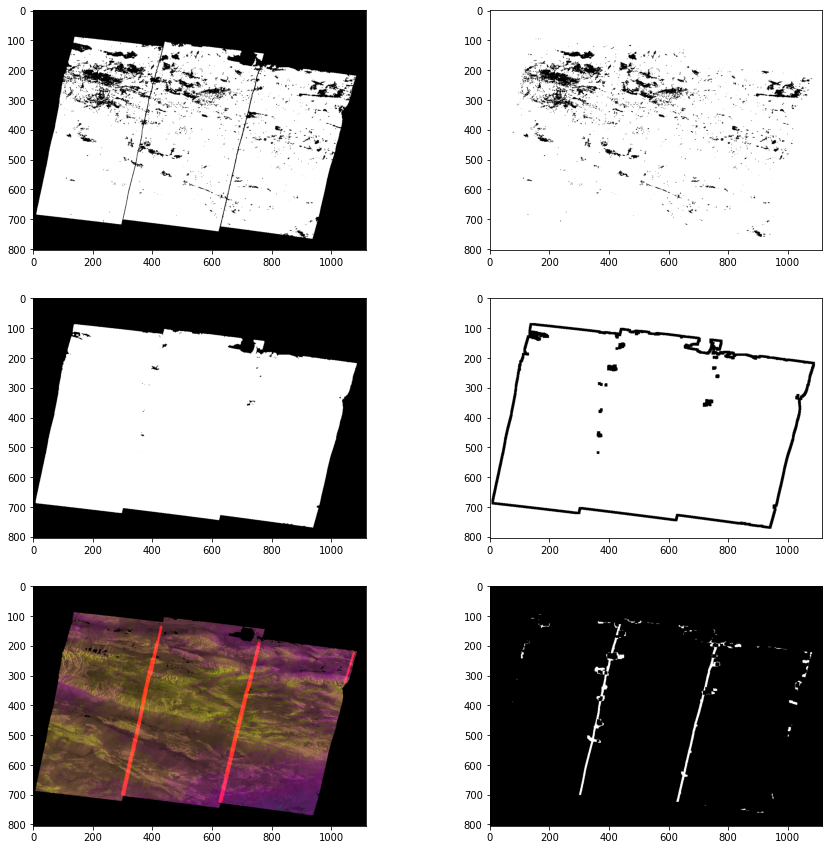

In [ ]:
#delik doldurma
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY_INV)[1]
im_floodfill = thresh.copy()
h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);


final = np.multiply(255-thresh, im_floodfill)
line_image = np.copy(image) * 0
mask = 1 - final
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
final = cv2.morphologyEx(final, cv2.MORPH_DILATE, kernel)
final = np.multiply(mask, final)

mask_dil = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
mask_erd = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
bound = mask_dil - mask_erd
bound = cv2.morphologyEx(bound, cv2.MORPH_DILATE, kernel)
bound = 1 - bound
final = np.multiply(bound, final)


# Kenarda algılanan görüntüde Hough'u çalıştırın
# Çıkış "satırları", tespit edilen çizgi bölümlerinin uç noktalarını içeren bir dizidir
lines = cv2.HoughLinesP(final, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
   for x1,y1,x2,y2 in line:
       cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)


plt.figure(figsize=(15, 15))
plt.subplot(321), plt.imshow(thresh, cmap='gray')
plt.subplot(322), plt.imshow(im_floodfill, cmap='gray')
plt.subplot(323), plt.imshow(mask, cmap='gray')
plt.subplot(324), plt.imshow(bound, cmap='gray')
plt.subplot(325), plt.imshow(lines_edges, cmap='gray')
plt.subplot(326), plt.imshow(final, cmap='gray')